In [25]:
# Preparing the environment
import pandas as pd           
import numpy as np            
import matplotlib.pyplot as plt 
import seaborn as sns        
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score  
import scipy.cluster.hierarchy as sch  
from yellowbrick.cluster import KElbowVisualizer  
import warnings
warnings.filterwarnings('ignore')
print("Libraries loaded successfully!")


Libraries loaded successfully!


In [26]:
#Importing the data
# Load the dataset
data = pd.read_csv('Customer Data.csv')

# Display the first 5 rows to confirm
print(data.head())
# Display a summary of the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [27]:
#Cleaning the dataset
# Check for duplicate rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Check for missing values in each column
missing_values = data.isna().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values
cleaned_data = data.dropna()  # Drop rows with any NA values
print(f"Shape of data after dropping missing values: {cleaned_data.shape}")

# Drop the 'CUST_ID' column (equivalent to 'cleaned_data <- cleaned_data[, -1]')
cleaned_data = cleaned_data.iloc[:, 1:]  # Keep all columns except the first
print(f"Shape of data after dropping 'CUST_ID': {cleaned_data.shape}")

# Verify the cleaned data
print(cleaned_data.head())

Number of duplicate rows: 0
Missing values in each column:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Shape of data after dropping missing values: (8636, 18)
Shape of data after dropping 'CUST_ID': (8636, 17)
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182 

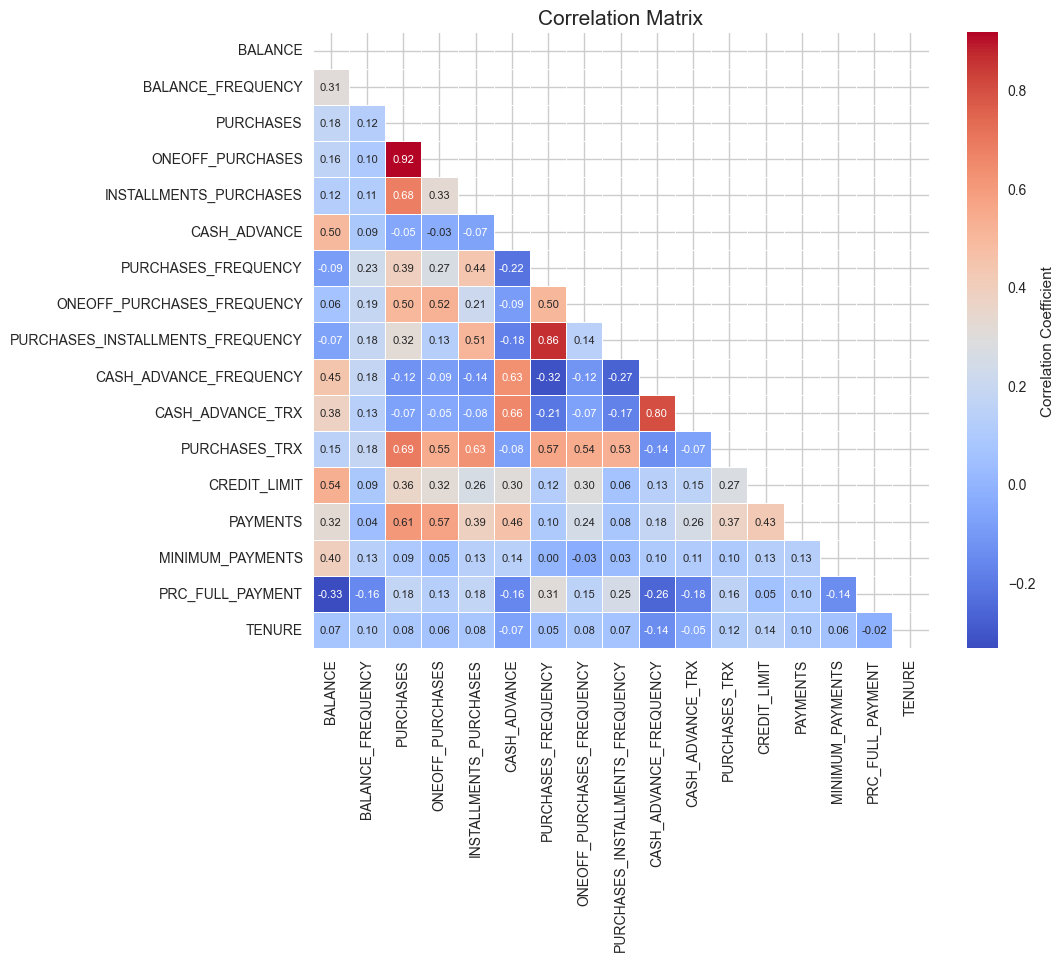

In [28]:
#Correlation matrix of the variables 
# Compute the correlation matrix
corr_matrix = cleaned_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,              
            fmt=".2f",                
            cmap="coolwarm",          
            cbar_kws={'label': 'Correlation Coefficient'}, 
            mask=np.triu(corr_matrix),  
            square=True,            
            linewidths=0.5,           
            annot_kws={'size': 8},     
            xticklabels=corr_matrix.columns, 
            yticklabels=corr_matrix.columns 
)

# Set the title and display the plot
plt.title('Correlation Matrix', fontsize=15)
plt.show()

In [29]:
# Compute the variance of each predictor 
# Calculate variance for each column in the cleaned_data dataframe
variance = cleaned_data.var()

# Display the variance of each column
print(variance)



BALANCE                             4.391419e+06
BALANCE_FREQUENCY                   4.313799e-02
PURCHASES                           4.696357e+06
ONEOFF_PURCHASES                    2.836893e+06
INSTALLMENTS_PURCHASES              8.413387e+05
CASH_ADVANCE                        4.500585e+06
PURCHASES_FREQUENCY                 1.610197e-01
ONEOFF_PURCHASES_FREQUENCY          9.003217e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.584780e-01
CASH_ADVANCE_FREQUENCY              4.071978e-02
CASH_ADVANCE_TRX                    4.778274e+01
PURCHASES_TRX                       6.340560e+02
CREDIT_LIMIT                        1.339004e+07
PAYMENTS                            8.466995e+06
MINIMUM_PAYMENTS                    5.629071e+06
PRC_FULL_PAYMENT                    8.777645e-02
TENURE                              1.718678e+00
dtype: float64


In [30]:
# Calculate the range (difference between max and min) for each column
range_values = cleaned_data.apply(lambda x: x.max() - x.min())

# Display the range for each column
print(range_values)


BALANCE                             19043.138560
BALANCE_FREQUENCY                       1.000000
PURCHASES                           49039.570000
ONEOFF_PURCHASES                    40761.250000
INSTALLMENTS_PURCHASES              22500.000000
CASH_ADVANCE                        47137.211760
PURCHASES_FREQUENCY                     1.000000
ONEOFF_PURCHASES_FREQUENCY              1.000000
PURCHASES_INSTALLMENTS_FREQUENCY        1.000000
CASH_ADVANCE_FREQUENCY                  1.500000
CASH_ADVANCE_TRX                      123.000000
PURCHASES_TRX                         358.000000
CREDIT_LIMIT                        29950.000000
PAYMENTS                            50721.433847
MINIMUM_PAYMENTS                    76406.188357
PRC_FULL_PAYMENT                        1.000000
TENURE                                  6.000000
dtype: float64


In [31]:
# Divide each column in the cleaned_data by its corresponding range value
my_df = cleaned_data.div(range_values, axis=1)

# Calculate variance for each column of the modified dataframe
variance_my_df = my_df.var()

# Display the variance of each column in my_df
print(variance_my_df)



BALANCE                             0.012110
BALANCE_FREQUENCY                   0.043138
PURCHASES                           0.001953
ONEOFF_PURCHASES                    0.001707
INSTALLMENTS_PURCHASES              0.001662
CASH_ADVANCE                        0.002026
PURCHASES_FREQUENCY                 0.161020
ONEOFF_PURCHASES_FREQUENCY          0.090032
PURCHASES_INSTALLMENTS_FREQUENCY    0.158478
CASH_ADVANCE_FREQUENCY              0.018098
CASH_ADVANCE_TRX                    0.003158
PURCHASES_TRX                       0.004947
CREDIT_LIMIT                        0.014928
PAYMENTS                            0.003291
MINIMUM_PAYMENTS                    0.000964
PRC_FULL_PAYMENT                    0.087776
TENURE                              0.047741
dtype: float64


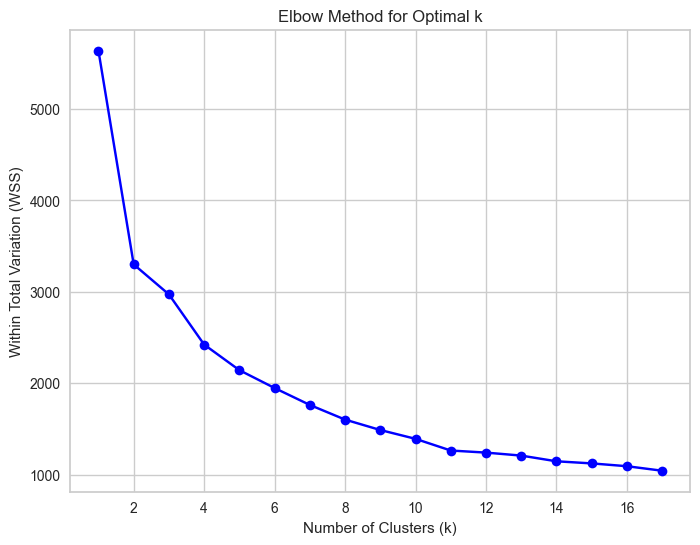

In [32]:
#K-means method 
# Set random seed for reproducibility
np.random.seed(10)

# Define the maximum number of clusters
k_max = 17

# List to store within-cluster sum of squares (WSS)
wss = []

# Loop through different values of k (clusters)
for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, n_init=1, random_state=10)
    kmeans.fit(my_df)
    wss.append(kmeans.inertia_)  # .inertia_ gives the WSS (within-cluster sum of squares)

# Plot the WSS values to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, k_max + 1), wss, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Total Variation (WSS)')
plt.grid(True)
plt.show()

In [33]:
from sklearn.cluster import KMeans

# If we consider K=2 clusters
km_2 = KMeans(n_clusters=2, n_init=1, random_state=10)
km_2_labels = km_2.fit_predict(my_df)  # Perform clustering and get labels

# Calculate the size of each cluster
km_2_sizes = np.bincount(km_2_labels)
print(f"Cluster sizes for K=2: {km_2_sizes}")

# If we consider K=3 clusters
km_3 = KMeans(n_clusters=3, n_init=1, random_state=10)
km_3_labels = km_3.fit_predict(my_df)  # Perform clustering and get labels

# Calculate the size of each cluster
km_3_sizes = np.bincount(km_3_labels)
print(f"Cluster sizes for K=3: {km_3_sizes}")


Cluster sizes for K=2: [4689 3947]
Cluster sizes for K=3: [1148 3747 3741]


Silhouette score for K=2: 0.39055019722650147


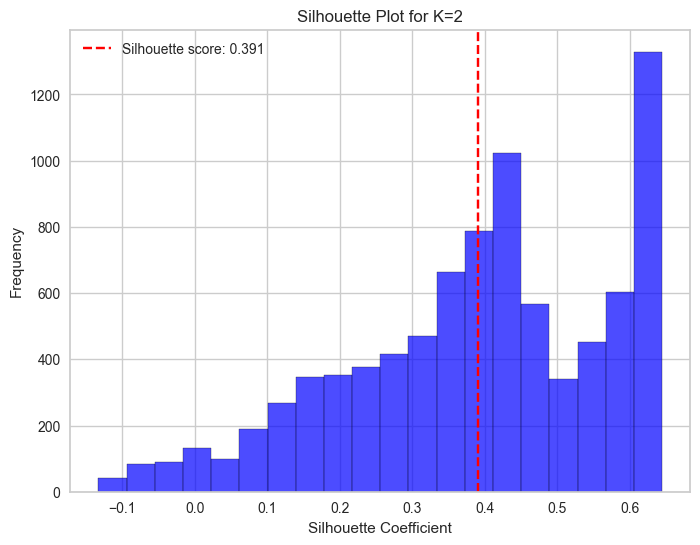

Silhouette score for K=3: 0.31638248575518807


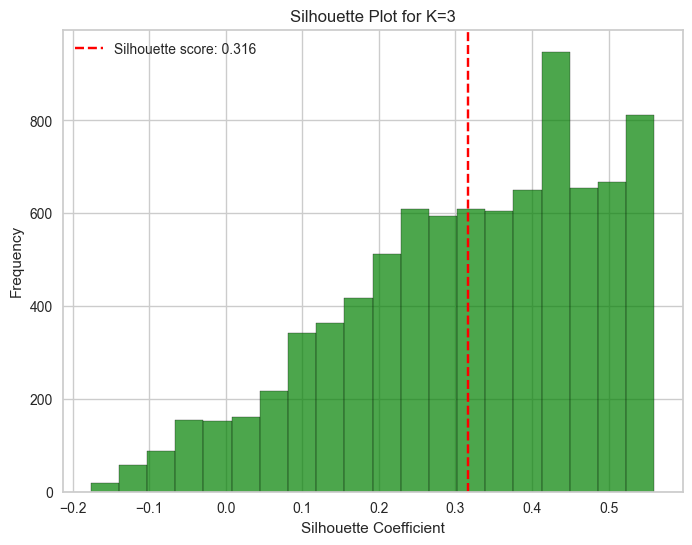

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculate the silhouette score for K=2 clusters
sil2_values = silhouette_samples(my_df, km_2_labels)
sil2_score = silhouette_score(my_df, km_2_labels)
print(f"Silhouette score for K=2: {sil2_score}")

# Plot Silhouette for K=2
plt.figure(figsize=(8, 6))
plt.hist(sil2_values, bins=20, edgecolor='black', color='blue', alpha=0.7)
plt.axvline(x=sil2_score, color='red', linestyle='--', label=f"Silhouette score: {sil2_score:.3f}")
plt.title("Silhouette Plot for K=2")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the silhouette score for K=3 clusters
sil3_values = silhouette_samples(my_df, km_3_labels)
sil3_score = silhouette_score(my_df, km_3_labels)
print(f"Silhouette score for K=3: {sil3_score}")

# Plot Silhouette for K=3
plt.figure(figsize=(8, 6))
plt.hist(sil3_values, bins=20, edgecolor='black', color='green', alpha=0.7)
plt.axvline(x=sil3_score, color='red', linestyle='--', label=f"Silhouette score: {sil3_score:.3f}")
plt.title("Silhouette Plot for K=3")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


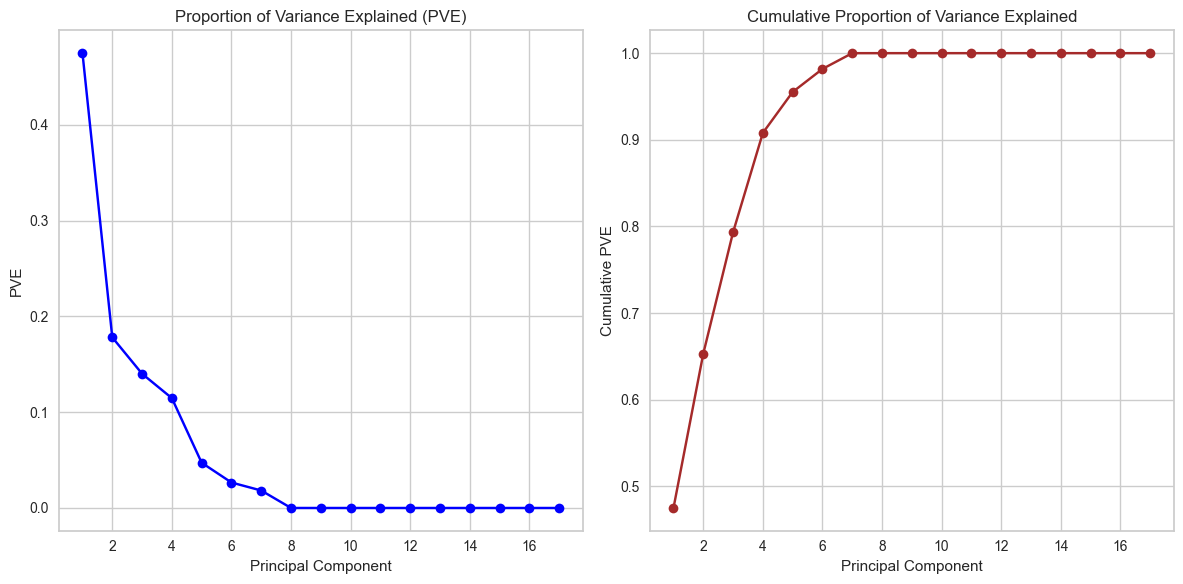

In [35]:
from sklearn.decomposition import PCA
# Perform PCA on the cleaned data
pca = PCA()
pca.fit(cleaned_data)

# Explained variance (PVE) for each principal component
pve = pca.explained_variance_ratio_

# Plotting the explained variance (PVE)
plt.figure(figsize=(12, 6))

# Plot for explained variance (PVE)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pve) + 1), pve, marker='o', color='blue')
plt.title("Proportion of Variance Explained (PVE)")
plt.xlabel("Principal Component")
plt.ylabel("PVE")

# Plot for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pve) + 1), np.cumsum(pve), marker='o', color='brown')
plt.title("Cumulative Proportion of Variance Explained")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative PVE")

plt.tight_layout()
plt.show()

Loadings of the principal components:
[[ 2.90915167e-01  6.54865438e-06  2.95256977e-01  2.12765003e-01
   8.24852809e-02  2.16935794e-01  1.27387421e-05  2.25874969e-05
   8.42520263e-06  1.01077630e-05  4.04545163e-04  2.35112327e-03
   6.87355151e-01  4.88048152e-01  1.35661270e-01  1.84422443e-06
   3.69405733e-05]
 [-3.13783169e-01 -4.91070303e-06  5.07958515e-01  3.86213936e-01
   1.21785536e-01 -2.19519682e-01  3.79977408e-05  2.95505424e-05
   3.05796822e-05 -2.05951389e-05 -5.46546039e-04  3.57420023e-03
  -4.28082046e-01  4.50365842e-01 -2.12696379e-01  2.66645094e-05
   4.09067641e-06]
 [ 2.55696913e-01  9.25953880e-06 -6.89748648e-02 -5.69808926e-02
  -1.20204775e-02  3.78832029e-01 -2.88246651e-05 -2.68216888e-05
  -1.57211726e-05  2.67448163e-05  9.43166451e-04 -7.76826566e-04
  -5.21715656e-01  3.02598009e-01  6.47458307e-01 -2.69631270e-05
  -2.53279010e-05]
 [ 4.81753949e-02  9.26565970e-06  2.92388375e-01  1.84341129e-01
   1.08064260e-01 -5.74535760e-01  4.49742726e-

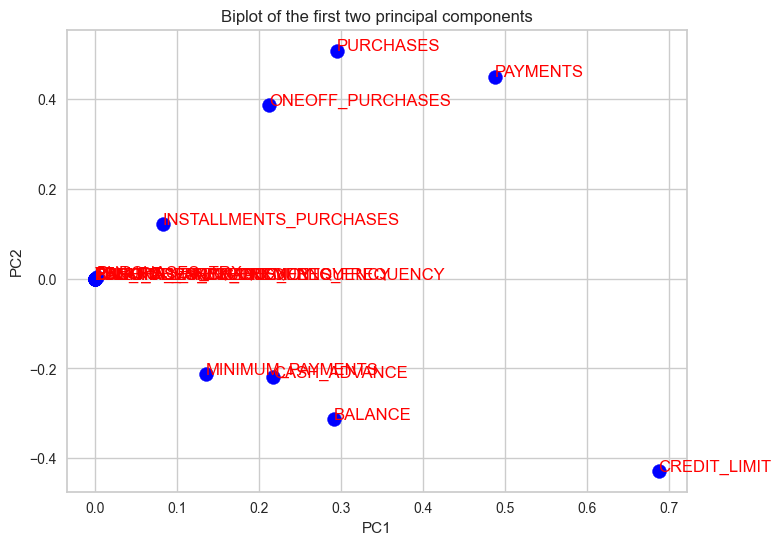

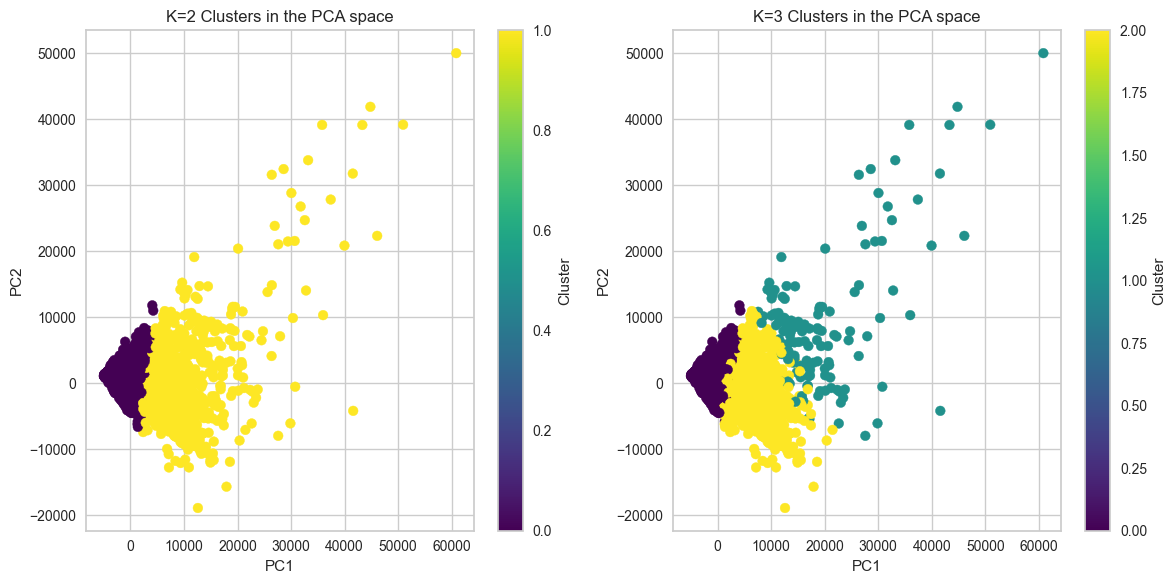

In [36]:
# Perform PCA on the cleaned data
pca = PCA()
pca.fit(cleaned_data)

# Extract the loadings (the components of each principal component)
loadings = pca.components_
print("Loadings of the principal components:")
print(loadings)

# Plotting the biplot (PCA projection with loadings)
plt.figure(figsize=(8, 6))
plt.scatter(pca.components_[0, :], pca.components_[1, :], color='blue', s=100)
for i, feature in enumerate(cleaned_data.columns):
    plt.text(pca.components_[0, i], pca.components_[1, i], feature, color='red', fontsize=12)
plt.title("Biplot of the first two principal components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Perform K-means clustering with K=2 and K=3
km_2 = KMeans(n_clusters=2, random_state=10)
km_2_labels = km_2.fit_predict(cleaned_data)

km_3 = KMeans(n_clusters=3, random_state=10)
km_3_labels = km_3.fit_predict(cleaned_data)

# Create the scatter plot for K=2 clusters in the first two principal components
plt.figure(figsize=(12, 6))

# K=2 cluster plot
plt.subplot(1, 2, 1)
plt.scatter(pca.transform(cleaned_data)[:, 0], pca.transform(cleaned_data)[:, 1], c=km_2_labels, cmap='viridis', marker='o')
plt.title("K=2 Clusters in the PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")

# K=3 cluster plot
plt.subplot(1, 2, 2)
plt.scatter(pca.transform(cleaned_data)[:, 0], pca.transform(cleaned_data)[:, 1], c=km_3_labels, cmap='viridis', marker='o')
plt.title("K=3 Clusters in the PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")

plt.tight_layout()
plt.show()

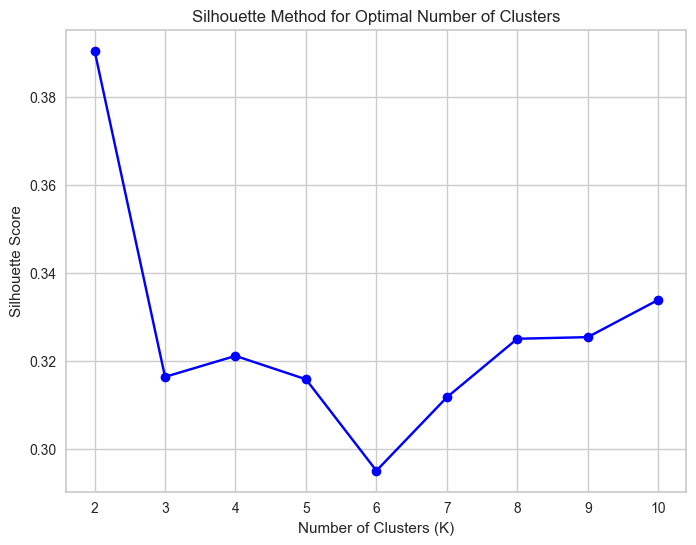

In [37]:
# Range of possible clusters
k_range = range(2, 11)

# List to store silhouette scores for each k
silhouette_scores = []

# Loop over each k and compute the silhouette score
for k in k_range:
    km = KMeans(n_clusters=k, random_state=10)
    labels = km.fit_predict(my_df)  # Cluster data
    score = silhouette_score(my_df, labels)  # Compute silhouette score
    silhouette_scores.append(score)

# Plot silhouette scores for each k
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='blue')
plt.title("Silhouette Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [38]:
# KMeans with K=2
km_2 = KMeans(n_clusters=2, random_state=10)
km_2_labels = km_2.fit_predict(my_df)  # Get the cluster labels for each data point

# Count the size of each cluster
cluster_sizes = np.bincount(km_2_labels)  # Count occurrences of each label (cluster)

# Display the sizes of the clusters
print("Cluster sizes for K=2:")
print(cluster_sizes)

Cluster sizes for K=2:
[4689 3947]


In [39]:
# Add the cluster labels (from km_2) as a new column in the original dataset
my_df['Cluster'] = km_2_labels

# Group by the cluster labels and get summary statistics for each group
summary_stats = my_df.groupby('Cluster').describe()

# Display the summary statistics
print(summary_stats)

        BALANCE                                                         \
          count      mean       std  min       25%       50%       75%   
Cluster                                                                  
0        4689.0  0.092124  0.108401  0.0  0.014115  0.058255  0.122834   
1        3947.0  0.074533  0.111225  0.0  0.005275  0.028965  0.095284   

                  BALANCE_FREQUENCY            ... PRC_FULL_PAYMENT       \
              max             count      mean  ...              75%  max   
Cluster                                        ...                         
0        0.856208            4689.0  0.852703  ...              0.0  1.0   
1        1.000000            3947.0  0.945325  ...              0.5  1.0   

         TENURE                                               
          count      mean       std  min  25%  50%  75%  max  
Cluster                                                       
0        4689.0  1.912952  0.226575  1.0  2.0  2.0  2.0  2.

In [40]:
#Hierarchical methods
# Scale the cleaned data
scaler = StandardScaler()
data_01 = scaler.fit_transform(cleaned_data)

# Convert the scaled data back to a DataFrame (optional)
data_01 = pd.DataFrame(data_01, columns=cleaned_data.columns)

# Display the scaled data
print(data_01.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.744625          -0.370047  -0.429184         -0.359160   
1  0.764152           0.067679  -0.473208         -0.359160   
2  0.426602           0.505405  -0.116413          0.099909   
3 -0.373910           0.505405  -0.465825         -0.349660   
4  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
3               -0.458839     -0.468655            -1.028455   
4                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2                    2.646651      

In [41]:
from scipy.spatial.distance import pdist, squareform
# Compute the pairwise Euclidean distances
d = pdist(data_01, metric='euclidean')

# Convert the condensed distance matrix to a square form for easier inspection (optional)
d_squareform = squareform(d)

# Display the Euclidean distance matrix (optional)
print(d_squareform)

[[0.         4.35911766 4.61515768 ... 5.15694072 4.76346626 5.67464449]
 [4.35911766 0.         5.59756084 ... 6.81521345 6.16915543 6.90193038]
 [4.61515768 5.59756084 0.         ... 6.43599498 6.79078267 5.70904282]
 ...
 [5.15694072 6.81521345 6.43599498 ... 0.         2.82345865 3.64232782]
 [4.76346626 6.16915543 6.79078267 ... 2.82345865 0.         3.36366589]
 [5.67464449 6.90193038 5.70904282 ... 3.64232782 3.36366589 0.        ]]


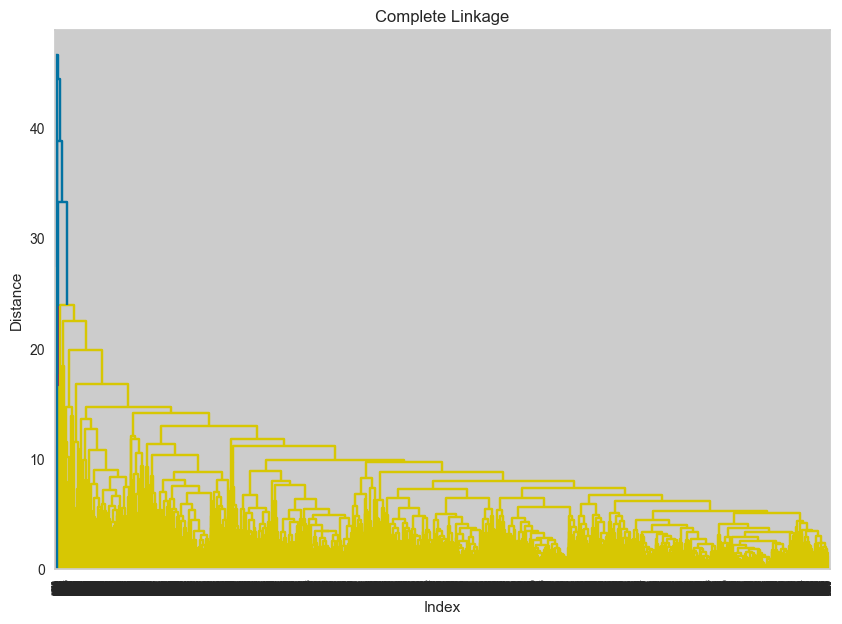

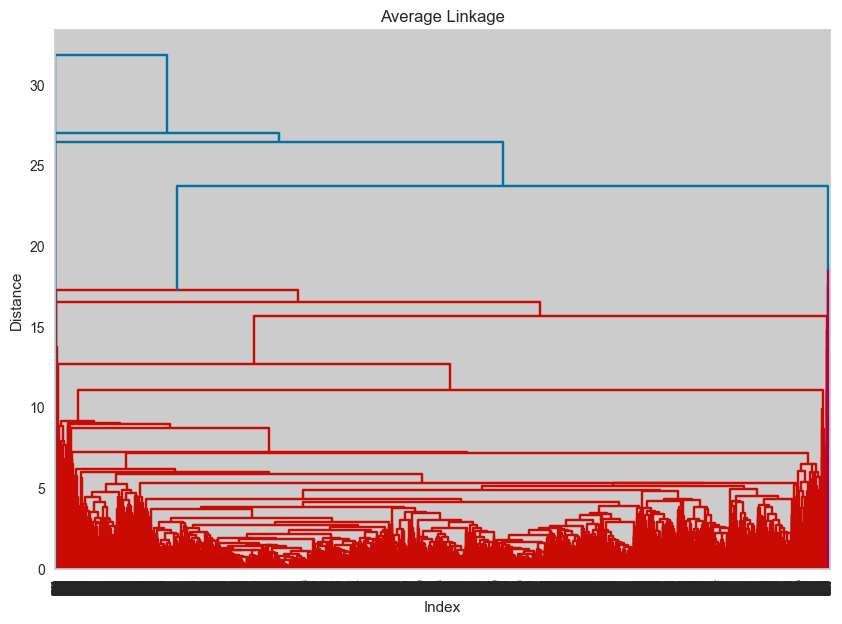

In [42]:
# Perform hierarchical clustering with different linkage methods
data_sl = sch.linkage(d, method='single')
data_cl = sch.linkage(d, method='complete')
data_al = sch.linkage(d, method='average')
data_ward = sch.linkage(d, method='ward')

# Plot the dendrogram for the complete linkage method
plt.figure(figsize=(10, 7))
sch.dendrogram(data_cl)
plt.title("Complete Linkage")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

# Plot the dendrogram for the average linkage method
plt.figure(figsize=(10, 7))
sch.dendrogram(data_al)
plt.title("Average Linkage")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

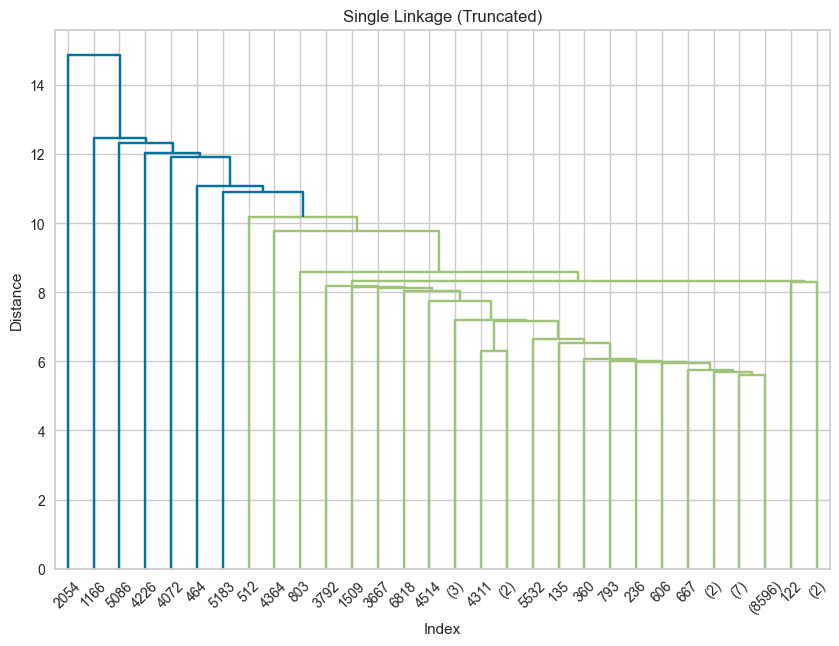

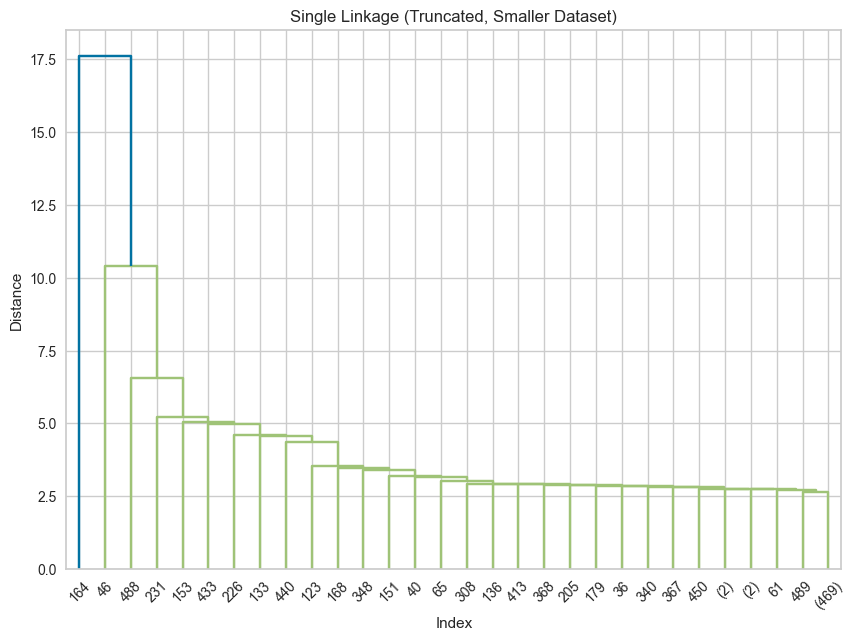

In [43]:
import sys

# Increase the recursion limit (default is 1000, we can try a higher value like 2000)
sys.setrecursionlimit(2000)
# Plot with truncated dendrogram (show only the first 30 merges)
plt.figure(figsize=(10, 7))
sch.dendrogram(data_sl, truncate_mode='lastp', p=30)
plt.title("Single Linkage (Truncated)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()
# Subset data if it's too large
small_data = data_01.sample(n=500, random_state=42)

# Recompute distances
d_small = pdist(small_data, metric='euclidean')
data_sl_small = sch.linkage(d_small, method='single')

# Plot the truncated dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(data_sl_small, truncate_mode='lastp', p=30)
plt.title("Single Linkage (Truncated, Smaller Dataset)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

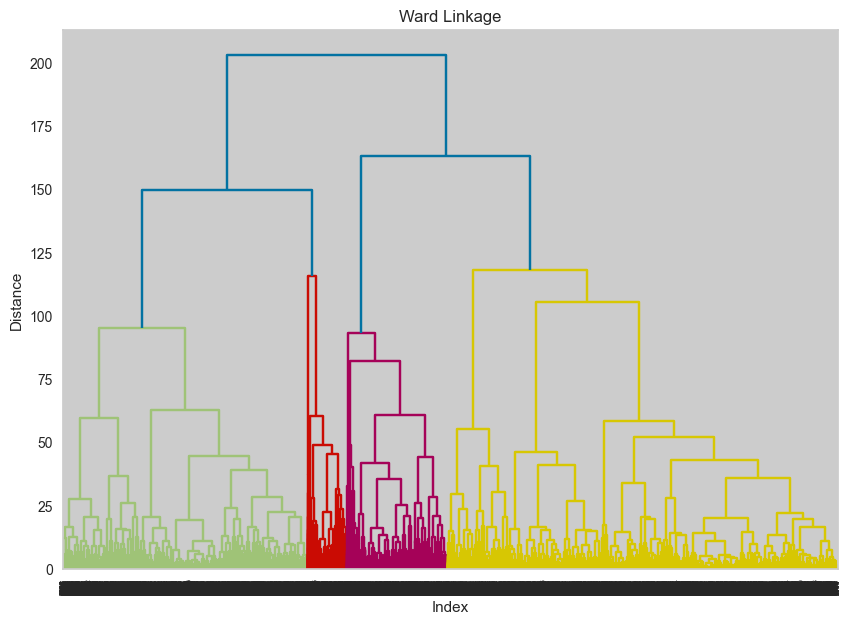

In [44]:
# Plot the dendrogram for the ward linkage method
plt.figure(figsize=(10, 7))
sch.dendrogram(data_ward)
plt.title("Ward Linkage")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

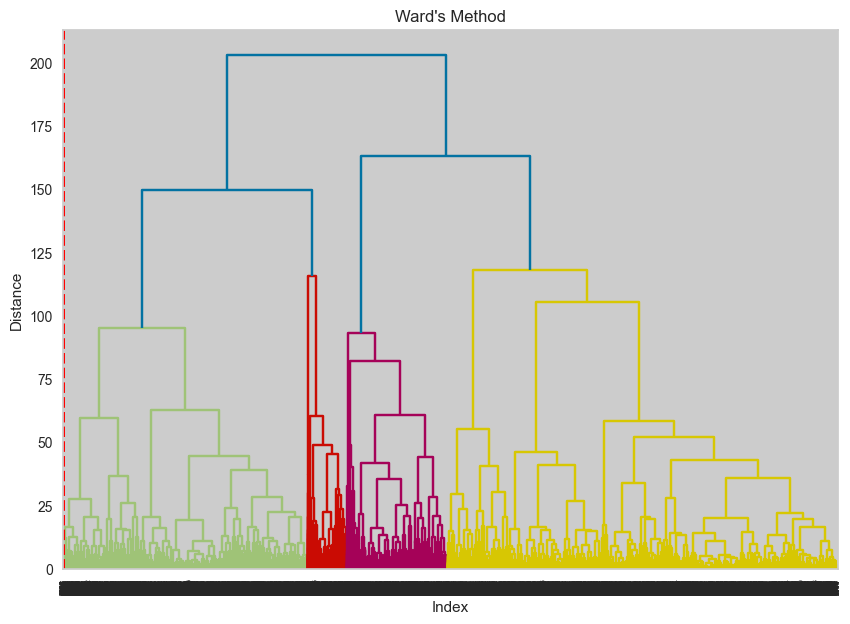

Cluster indicator vector (for 2 clusters):
[2 2 1 ... 2 2 2]


In [45]:
import scipy.cluster.hierarchy as sch
# Perform hierarchical clustering with Ward's method
data_ward = sch.linkage(d, method='ward')

# Create a cluster indicator vector (equivalent to cutree in R)
# We want to cut the dendrogram into 2 clusters
cw = sch.fcluster(data_ward, t=2, criterion='maxclust')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(data_ward)
plt.title("Ward's Method")
plt.xlabel("Index")
plt.ylabel("Distance")

# Draw rectangles around the clusters (k=2)
for i in range(2):  # k=2 clusters
    plt.axvline(x=i, color='red', linestyle='--', lw=2)

plt.show()

# Display the cluster indicator vector
print("Cluster indicator vector (for 2 clusters):")
print(cw)


In [46]:

# Convert cluster indicator vector (cw) to a Pandas DataFrame
cw_df = pd.DataFrame(cw, columns=['Cluster'])

# Combine the cluster labels with the cleaned data for analysis
clustered_data = pd.DataFrame(cleaned_data, columns=cleaned_data.columns)
clustered_data['Cluster'] = cw_df['Cluster']

# 1. Cluster Size (Frequency of Each Cluster)
cluster_sizes = clustered_data['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# 2. Summary Statistics by Cluster
cluster_summary = clustered_data.groupby('Cluster').describe()
print("\nSummary Statistics by Cluster:")
print(cluster_summary)


Cluster Sizes:
Cluster
2.0    5275
1.0    3064
Name: count, dtype: int64

Summary Statistics by Cluster:
        BALANCE                                                              \
          count         mean          std       min         25%         50%   
Cluster                                                                       
1.0      3064.0  1691.250575  2187.722684  0.000199  167.328754  966.955238   
2.0      5275.0  1610.098542  2073.192834  0.000000  159.758445  947.223495   

                                  BALANCE_FREQUENCY            ...  \
                 75%          max             count      mean  ...   
Cluster                                                        ...   
1.0      2268.355497  18495.55855            3064.0  0.901596  ...   
2.0      2125.895100  19043.13856            5275.0  0.895494  ...   

        PRC_FULL_PAYMENT       TENURE                                        \
                     75%  max   count       mean       std  min   25%